In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [6]:
data = pd.read_csv("../Large_data/feature/bnp-paribas-card-claim/train.csv", nrows=50000)
data.shape

(50000, 133)

In [7]:
#feature selection should be done after data preprocessing
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape
#[col for col in data.columns if data[col].isnull().sum() > 0] #presence of null value

(50000, 114)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=["target","ID"], axis =1),
    data["target"],
    test_size = 0.3,
    random_state = 0
)
del data
X_train.shape, X_test.shape


((35000, 112), (15000, 112))

In [10]:
roc_value = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_value.append(roc_auc_score(y_test, y_scored[:,1]))

In [12]:
roc_value = pd.Series(roc_value)
roc_value.index = X_train.columns
roc_value.sort_values(ascending=False)

v10     0.625163
v50     0.591156
v14     0.579888
v129    0.573197
v62     0.566037
          ...   
v85     0.496781
v28     0.496571
v73     0.496035
v18     0.495597
v16     0.490329
Length: 112, dtype: float64

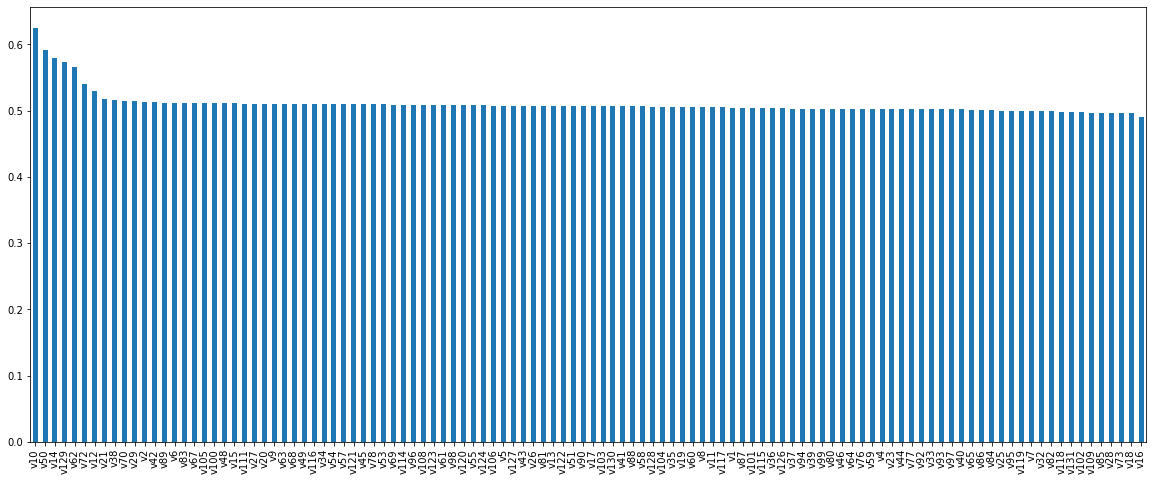

In [15]:
 roc_value.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [19]:
len(roc_value[roc_value>0.505])

69

In [20]:
data = pd.read_csv("../Large_data/feature/house-prices/train.csv", nrows=50000) 
data.shape

(1460, 81)

In [21]:
#feature selection should be done after data preprocessing
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape
#[col for col in data.columns if data[col].isnull().sum() > 0] #presence of null value

(1460, 38)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=["SalePrice"], axis =1),
    data["SalePrice"],
    test_size = 0.3,
    random_state = 0
)
del data
X_train.shape, X_test.shape


((1022, 37), (438, 37))

In [25]:
mse_values = []
for feature in X_train.columns:
    clf = DecisionTreeRegressor()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(y_test, y_scored))

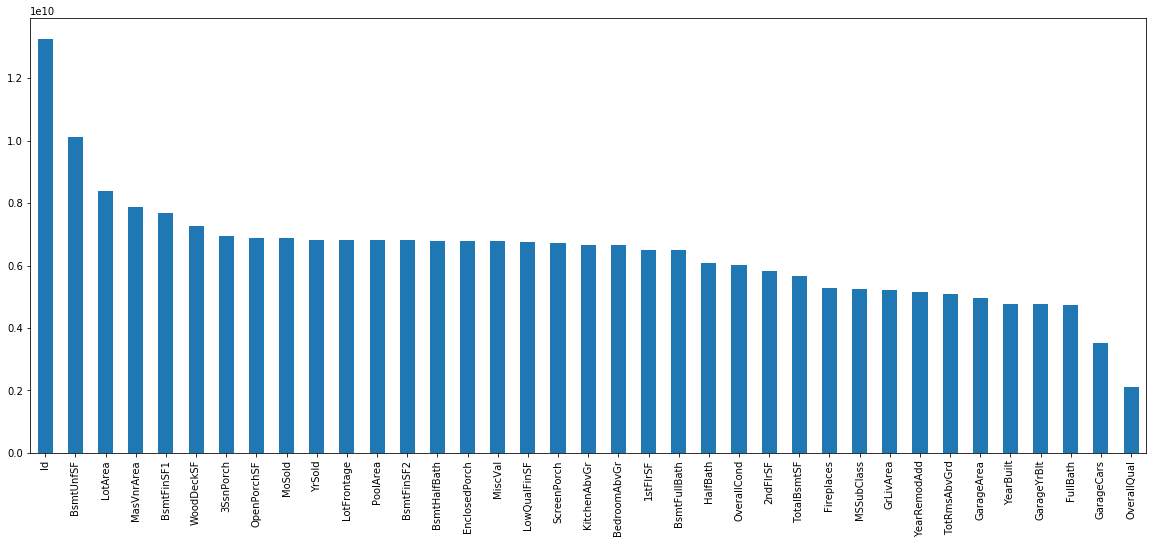

In [26]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

Remember for regression, the smaller the mse the better he model performance, so in this case we have to select from right to the left